# olist 데이터 매출 예측
- 목표 : 특정 시간을 기준으로 기간 매출 예측
- 예측 변수 : 시간, 지역(state) 컬럼
      
- 기준시 : 2018-05-12 15:05
    - 2018-05-06 - 2018-05-13. (주) 매출 예측
    - 2018-05-01 - 2018-05-31 (월) 매출 예측
    - 2018-04-01 - 2018-06-30 (분기) 매출 예측

## 1. import

In [1]:
import pandas as pd
import numpy as np
from functools import reduce

import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

## 2. 데이터 불러오기

In [2]:
original_df = pd.read_csv('olist_total.csv')
original_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115032,2c12150c742ae2fa48bc703964c16c5f,1,2b54fb9a4acf707537eb53eb2458c241,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-02 17:50:12,57.90,19.60,ab0cf72dfe0538a63a57d6905ccb7b57,delivered,2018-07-28 17:55:27,...,1000.0,25.0,25.0,25.0,17201,jau,SP,-22.294360,-48.558524,arts_and_craftmanship
115033,2ef4a11b6e24fdfbb43b92cb5f95edff,1,9c313adb4b38a55b092f53f83f78be9e,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,19.00,12.86,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,...,500.0,16.0,6.0,16.0,17201,jau,SP,-22.294360,-48.558524,arts_and_craftmanship
115034,2ef4a11b6e24fdfbb43b92cb5f95edff,2,eacb104882d39ffb53140b1d1860a7c3,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,39.90,12.87,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,...,500.0,21.0,7.0,14.0,17201,jau,SP,-22.294360,-48.558524,arts_and_craftmanship
115035,9f7ba492c273ffac8f90a623b8eadd3b,1,5aa0d6ed4e6c0995d62090cd82cde89a,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-28 03:24:24,11.90,12.79,c61336d6c835632048f973d2f2db598d,delivered,2018-08-23 12:31:37,...,200.0,16.0,6.0,16.0,17201,jau,SP,-22.294360,-48.558524,arts_and_craftmanship


In [3]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115037 entries, 0 to 115036
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115037 non-null  object 
 1   order_item_id                  115037 non-null  int64  
 2   product_id                     115037 non-null  object 
 3   seller_id                      115037 non-null  object 
 4   shipping_limit_date            115037 non-null  object 
 5   price                          115037 non-null  float64
 6   freight_value                  115037 non-null  float64
 7   customer_id                    115037 non-null  object 
 8   order_status                   115037 non-null  object 
 9   order_purchase_timestamp       115037 non-null  object 
 10  order_approved_at              115023 non-null  object 
 11  order_delivered_carrier_date   113852 non-null  object 
 12  order_delivered_customer_date 

## 3. 데이터 전처리

In [6]:
df = original_df.copy()
df = df[['order_purchase_timestamp','customer_state','customer_city','customer_zip_code_prefix','payment_value']]
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].str[:10]
df = df.sort_values(by=['order_purchase_timestamp','customer_state']).reset_index(drop=True)
df

,order_purchase_timestamp,customer_state,customer_city,customer_zip_code_prefix,payment_value
0,2016-09-04,RR,boa vista,69309,136.23
1,2016-09-04,RR,boa vista,69309,136.23
2,2016-09-05,RS,passo fundo,99025,75.06
3,2016-10-02,SP,sao paulo,2975,109.34
4,2016-10-03,GO,mozarlandia,76700,154.57
...,...,...,...,...,...
115032,2018-08-29,SP,salto,13322,119.42
115033,2018-08-29,SP,hortolandia,13184,106.95
115034,2018-08-29,SP,sao bernardo do campo,9625,178.25
115035,2018-08-29,SP,sao caetano do sul,9541,33.23


In [52]:
df_state = pd.pivot_table(data=df, index=['order_purchase_timestamp','customer_state'], values='payment_value', aggfunc='sum')
df_state = df_state.reset_index()
df_state

,order_purchase_timestamp,customer_state,payment_value
0,2016-09-04,RR,136.23
1,2016-09-05,RS,75.06
2,2016-10-02,SP,109.34
3,2016-10-03,GO,154.57
4,2016-10-03,MG,92.27
...,...,...,...
10598,2018-08-28,SP,3507.16
10599,2018-08-29,MG,61.29
10600,2018-08-29,PR,510.96
10601,2018-08-29,SP,1190.45


#### 라벨인코딩

In [54]:
from sklearn.preprocessing import LabelEncoder
le_state = LabelEncoder()

df_state['state_label'] = le_state.fit_transform(df_state['customer_state'])
df_state['state_label'].unique(), le_state.classes_

(array([21, 22, 25,  8, 10, 18,  4,  5,  7, 12, 13, 15, 17, 19, 23,  6,  9,
         1, 24, 16, 14,  0, 11, 26, 20,  2,  3]),
 array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
        'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
        'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object))

In [55]:
df_state

,order_purchase_timestamp,customer_state,payment_value,state_label
0,2016-09-04,RR,136.23,21
1,2016-09-05,RS,75.06,22
2,2016-10-02,SP,109.34,25
3,2016-10-03,GO,154.57,8
4,2016-10-03,MG,92.27,10
...,...,...,...,...
10598,2018-08-28,SP,3507.16,25
10599,2018-08-29,MG,61.29,10
10600,2018-08-29,PR,510.96,17
10601,2018-08-29,SP,1190.45,25


In [56]:
df_2017 = df_state[(df_state['order_purchase_timestamp']>='2017-01-01')&(df_state['order_purchase_timestamp']<'2018')].reset_index(drop=True)

df_2017['order_purchase_date'] = pd.to_datetime(df_2017['order_purchase_timestamp'])

df_2017['purchase_year'] = df_2017['order_purchase_date'].dt.year
df_2017['purchase_month'] = df_2017['order_purchase_date'].dt.month
df_2017['purchase_day'] = df_2017['order_purchase_date'].dt.day

df_2017 = df_2017.drop(['order_purchase_timestamp'], axis=1)
df_2017

,customer_state,payment_value,state_label,order_purchase_date,purchase_year,purchase_month,purchase_day
0,BA,91.92,4,2017-01-05,2017,1,5
1,ES,50.95,7,2017-01-05,2017,1,5
2,PR,270.30,17,2017-01-05,2017,1,5
3,SP,24.42,25,2017-01-05,2017,1,5
4,MG,300.12,10,2017-01-06,2017,1,6
...,...,...,...,...,...,...,...
5919,RJ,353.74,18,2017-12-31,2017,12,31
5920,RN,42.27,19,2017-12-31,2017,12,31
5921,RS,428.74,22,2017-12-31,2017,12,31
5922,SC,478.54,23,2017-12-31,2017,12,31


## 4. 모델링

In [57]:
from sklearn.model_selection import train_test_split

X = df_2017[['purchase_year', 'purchase_month', 'purchase_day', 'state_label']]
y = df_2017['payment_value']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=128)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4739, 4), (1185, 4), (4739,), (1185,))

In [17]:
from sklearn.ensemble import *
from sklearn.tree import *
from lightgbm import LGBMRegressor

etsr = ExtraTreesRegressor()
rfr = RandomForestRegressor()
etr = ExtraTreeRegressor()
bgr = BaggingRegressor()
dtr = DecisionTreeRegressor()
lgbmr = LGBMRegressor()

In [35]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import *

def rmsle(y, y_pred):
    msle = mean_squared_log_error(y, y_pred)
    rmsle = np.sqrt(msle)
    return rmsle

def model_diff(x_train, x_test, y_train, y_test):
    etsr.fit(x_train, y_train)
    y_pred1 = etsr.predict(x_test)

    rfr.fit(x_train, y_train)
    y_pred2 = rfr.predict(x_test)
    
    etr.fit(x_train, y_train)
    y_pred3 = etr.predict(x_test)
    
    bgr.fit(x_train, y_train)
    y_pred4 = bgr.predict(x_test)
    
    dtr.fit(x_train, y_train)
    y_pred5 = dtr.predict(x_test)
    
    # lgbmr.fit(x_train, y_train)
    # y_pred6 = lgbmr.predict(x_test)
    
    estr_rmsle = rmsle(y_test, y_pred1)
    rfr_rmsle = rmsle(y_test, y_pred2)
    etr_rmsle = rmsle(y_test, y_pred3)
    bgr_rmsle = rmsle(y_test, y_pred4)
    dtr_rmsle = rmsle(y_test, y_pred5)
    # lgbmr_rmsle = rmsle(y_test, y_pred6)

    # result_rmsle_list = [estr_rmsle, rfr_rmsle, etr_rmsle, bgr_rmsle, dtr_rmsle, lgbmr_rmsle]
    result_rmsle_list = [estr_rmsle, rfr_rmsle, etr_rmsle, bgr_rmsle, dtr_rmsle]

    return result_rmsle_list  

In [36]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler

# 정규화 진행하지 않은 상태
no_scaler = model_diff(x_train, x_test, y_train, y_test)

# Normalize 정규화 적용
norm = Normalizer()
x_train_norm = norm.fit_transform(x_train)
x_test_norm = norm.transform(x_test)
normalizer_scaler = model_diff(x_train_norm, x_test_norm, y_train, y_test)

# Robust 정규화 적용
robust = RobustScaler()
x_train_robust = robust.fit_transform(x_train)
x_test_robust = robust.transform(x_test)
robust_scaler = model_diff(x_train_robust, x_test_robust, y_train, y_test)

# 세 가지 케이스 RMSE 값 비교
# result = pd.DataFrame(index=['ExtraTreesRegressor','RandomForestRegressor','ExtraTreeRegressor',
#                             'BaggingRegressor','DecisionTreeRegressor','LGBMRegressor'], 
#                     columns=['no_scaler', 'normalizer', 'robust', 'min'])

result = pd.DataFrame(index=['ExtraTreesRegressor','RandomForestRegressor','ExtraTreeRegressor',
                            'BaggingRegressor','DecisionTreeRegressor'], 
                    columns=['no_scaler', 'normalizer', 'robust', 'min'])

result['no_scaler'] = no_scaler
result['normalizer'] = normalizer_scaler
result['robust'] = robust_scaler

for idx, row in result.iterrows():
    result.loc[idx, 'min'] = row.min()
result

,no_scaler,normalizer,robust,min
ExtraTreesRegressor,1.085225,1.094288,1.080433,1.080433
RandomForestRegressor,1.101549,1.084193,1.103492,1.084193
ExtraTreeRegressor,1.254482,1.282449,1.213135,1.213135
BaggingRegressor,1.122976,1.115102,1.107033,1.107033
DecisionTreeRegressor,1.312273,1.279290,1.311408,1.27929


## 5. 하이퍼파라미터 조정

In [37]:
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

# 모델을 할당할 리스트 생성
estimators = []

# estimators 모델 추가
estimators.append(etsr)
estimators.append(rfr)
estimators.append(bgr)

# 파라미터 할당 리스트 생ㅅ어
params = []

# ExtraTreesRegressor
params_etsr = {'n_estimators':[50,100,150],
                'min_samples_split':[2,4,6,8],
                'max_depth':[2,5,10]}
params.append(params_etsr)

# RandomForestRegressor
params_rfr = {'n_estimators' : [90, 100, 110, 120],
            'min_samples_split' : [1,2,3,4]}
params.append(params_rfr)

# BaggingRegressor
params_bgr = {'bootstrap':[True,False],
             'n_estimators':[60,70,80,90,100,110,120,130,140,150]}
params.append(params_bgr)

def gridSearchCV(models, params):
    
    best_models=[]
    
    for i in tqdm(range(0,len(models))):
        model_grid = GridSearchCV(models[i], params[i], n_jobs = -1, verbose=1, cv=5)
        model_grid.fit(x_train_robust, y_train)
        best_models.append(model_grid.best_estimator_)
    return best_models

best_model_list = gridSearchCV(estimators, params)

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 33%|████████████████████████████                                                        | 1/3 [00:10<00:20, 10.45s/it]

Fitting 5 folds for each of 16 candidates, totalling 80 fits


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:17<00:08,  8.56s/it]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:30<00:00, 10.24s/it]


In [38]:
best_model_list

[ExtraTreesRegressor(max_depth=10, min_samples_split=8, n_estimators=150),
 RandomForestRegressor(min_samples_split=4, n_estimators=90),
 BaggingRegressor(n_estimators=150)]

In [83]:
print('ExtraTreesRegressor rmse : ',rmsle(y_test, best_model_list[0].predict(x_test_robust)))
print('RandomForestRegressor rmse : ',rmsle(y_test, best_model_list[1].predict(x_test_robust)))
print('BaggingRegressor rmse : ',rmsle(y_test, best_model_list[2].predict(x_test_robust)))

ExtraTreesRegressor rmse :  1.0448103121078012
RandomForestRegressor rmse :  1.0965536881982139
BaggingRegressor rmse :  1.0935009701736957


- 베스트 모델  
ExtraTreesRegressor(max_depth=10, min_samples_split=8, n_estimators=150)

In [40]:
result = pd.DataFrame()
result['실제값'] = y_test.round()
result['예측값'] = best_model_list[0].predict(x_test_robust).round()
result['차이'] = abs(result['실제값'] - result['예측값'])
result

,실제값,예측값,차이
3615,12487.0,8984.0,3503.0
2441,798.0,525.0,273.0
5397,111.0,464.0,353.0
4802,3027.0,7329.0,4302.0
1480,939.0,804.0,135.0
...,...,...,...
4307,2293.0,3723.0,1430.0
1795,331.0,455.0,124.0
953,10060.0,5574.0,4486.0
5718,4761.0,4023.0,738.0


In [42]:
result = pd.merge(df_2017, result, left_index=True, right_index=True, how='inner')
result = result[['order_purchase_date', 'customer_state', '실제값', '예측값', '차이']]
result.set_index(['order_purchase_date'], inplace=True)

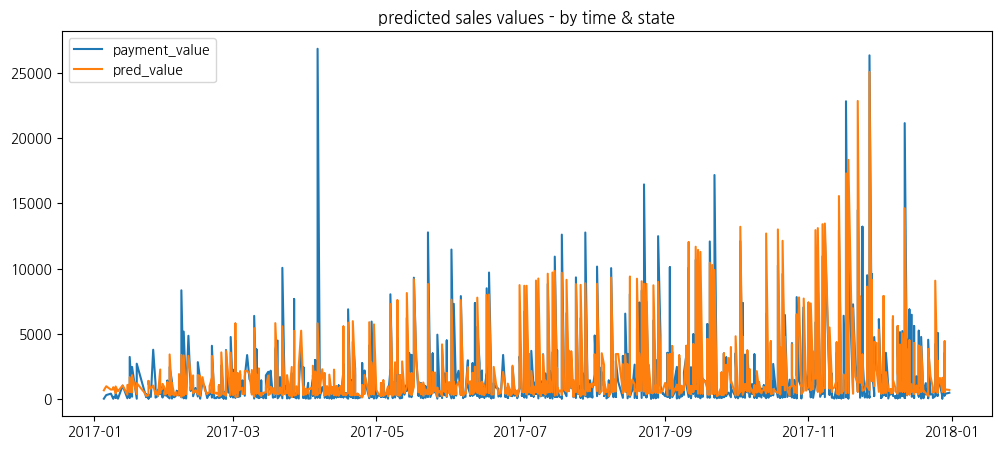

In [47]:
plt.figure(figsize=(12,5))
plt.plot(result.index, result['실제값'], linestyle='-', label='payment_value')
plt.plot(result.index, result['예측값'], linestyle='-', label='pred_value')
plt.title('predicted sales values - by time & state')
plt.legend()
plt.show()

## 6. 주/월/분기 예측
2018-05-06 - 2018-05-12. (주) 매출 예측  
2018-05-01 - 2018-05-31 (월) 매출 예측  
2018-04-01 - 2018-06-30 (분기) 매출 예측

In [70]:
# df_state.set_index(['order_purchase_timestamp'], inplace=True)
df_state

,order_purchase_timestamp,customer_state,payment_value,state_label
0,2016-09-04,RR,136.23,21
1,2016-09-05,RS,75.06,22
2,2016-10-02,SP,109.34,25
3,2016-10-03,GO,154.57,8
4,2016-10-03,MG,92.27,10
...,...,...,...,...
10598,2018-08-28,SP,3507.16,25
10599,2018-08-29,MG,61.29,10
10600,2018-08-29,PR,510.96,17
10601,2018-08-29,SP,1190.45,25


In [76]:
df_day_2018 = df_state[(df_state.order_purchase_timestamp>='2018') & (df_state.order_purchase_timestamp<'2019')].copy()
df_day_2018 = df_day_2018.reset_index(drop=True)
df_day_2018['order_purchase_date'] = pd.to_datetime(df_day_2018['order_purchase_timestamp'])

del df_day_2018['order_purchase_timestamp']

df_day_2018['purchase_year'] = df_day_2018['order_purchase_date'].dt.year
df_day_2018['purchase_month'] = df_day_2018['order_purchase_date'].dt.month
df_day_2018['purchase_day'] = df_day_2018['order_purchase_date'].dt.day

df_day_2018

,customer_state,payment_value,state_label,order_purchase_date,purchase_year,purchase_month,purchase_day
0,AL,184.36,1,2018-01-01,2018,1,1
1,BA,288.83,4,2018-01-01,2018,1,1
2,CE,55.62,5,2018-01-01,2018,1,1
3,DF,554.98,6,2018-01-01,2018,1,1
4,ES,584.82,7,2018-01-01,2018,1,1
...,...,...,...,...,...,...,...
4584,SP,3507.16,25,2018-08-28,2018,8,28
4585,MG,61.29,10,2018-08-29,2018,8,29
4586,PR,510.96,17,2018-08-29,2018,8,29
4587,SP,1190.45,25,2018-08-29,2018,8,29


In [86]:
X = df_day_2018[['purchase_year','purchase_month','purchase_day', 'state_label']]
x_robust = robust.transform(X)
y = df_day_2018['payment_value']

result = pd.DataFrame()
result['order_purchase_date'] = df_day_2018['order_purchase_date']
result['state_label'] = df_day_2018['state_label']
result['customer_state'] = le_state.inverse_transform(result.state_label)

result['실제값'] = y.round(2)
result['예측값'] = best_model_list[0].predict(x_robust).round(2)
result['차이'] = abs(result['실제값'] - result['예측값'])

result = result.set_index(['order_purchase_date'])
result

,state_label,customer_state,실제값,예측값,차이
order_purchase_date,,,,,
2018-01-01,1,AL,184.36,768.46,584.10
2018-01-01,4,BA,288.83,281.28,7.55
2018-01-01,5,CE,55.62,235.39,179.77
2018-01-01,6,DF,554.98,249.80,305.18
2018-01-01,7,ES,584.82,266.85,317.97
...,...,...,...,...,...
2018-08-28,25,SP,3507.16,8918.79,5411.63
2018-08-29,10,MG,61.29,2865.11,2803.82
2018-08-29,17,PR,510.96,1773.94,1262.98


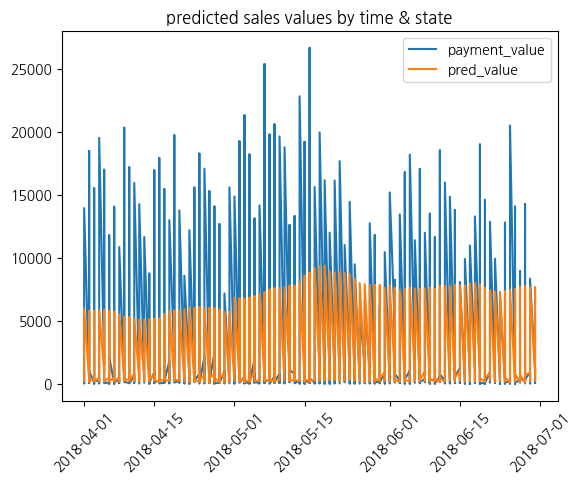

In [87]:
# plt.figure(figsize=(12,5))

result = result[(result.index>=pd.to_datetime('2018-04'))&(result.index<pd.to_datetime('2018-07'))]

plt.plot(result['실제값'], linestyle='-', label='payment_value')
plt.plot(result['예측값'], linestyle='-', label='pred_value')
plt.title('predicted sales values by time & state')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [91]:
def draw_predict_val_state(df, state):
    predict_state = df[df['customer_state']==state]
    
    title = f'predicted sales for "{state}"'
    
    plt.plot(predict_state['실제값'], linestyle='-', label='payment_value')
    plt.plot(predict_state['예측값'], linestyle='-', label='pred_value')    
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

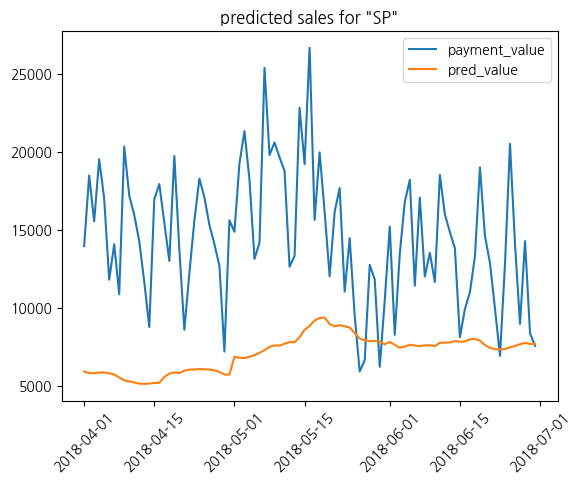

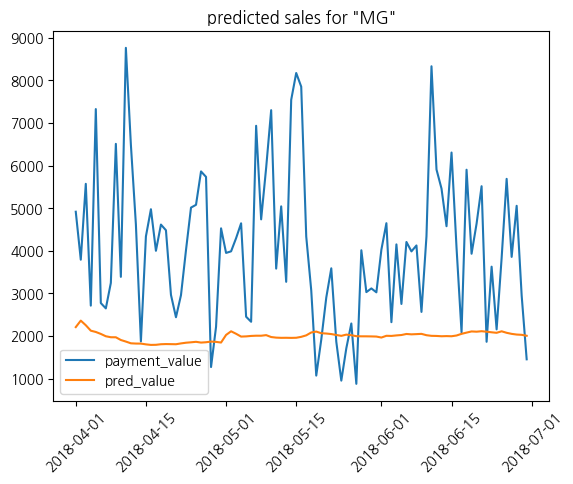

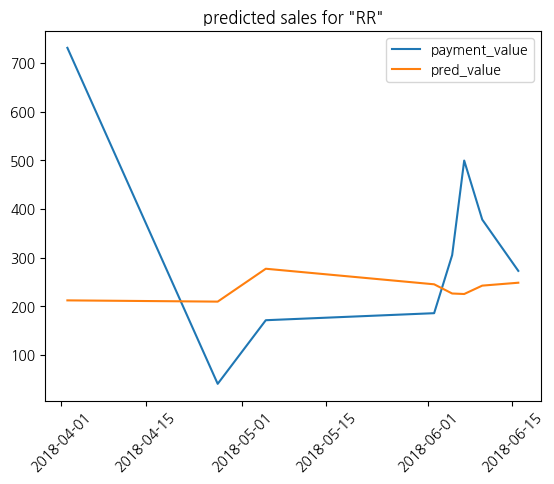

In [93]:
draw_predict_val_state(result, 'SP')
draw_predict_val_state(result, 'MG')
draw_predict_val_state(result, 'RR')

## 7. 주/월/분기 별 예측값 확인

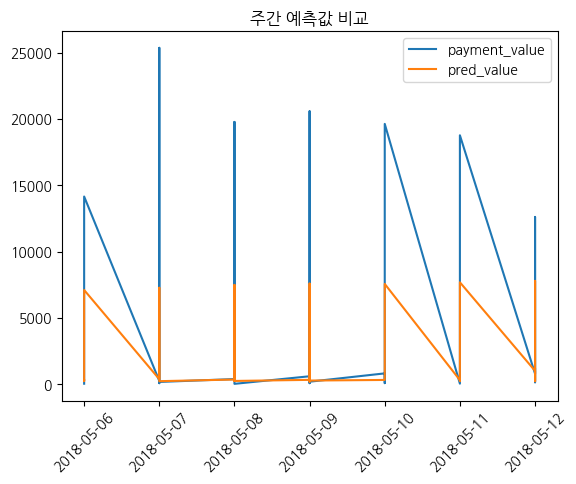

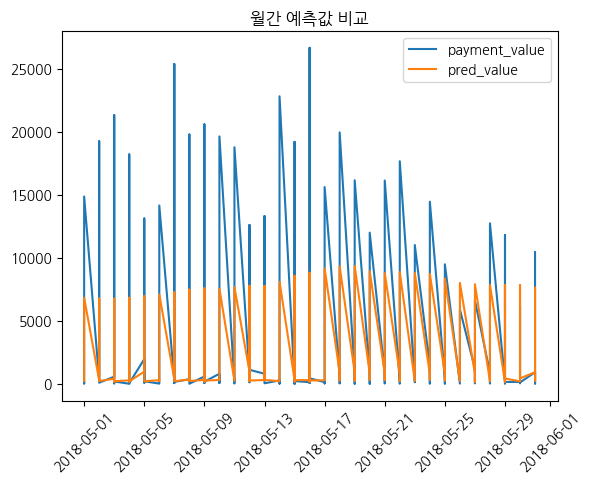

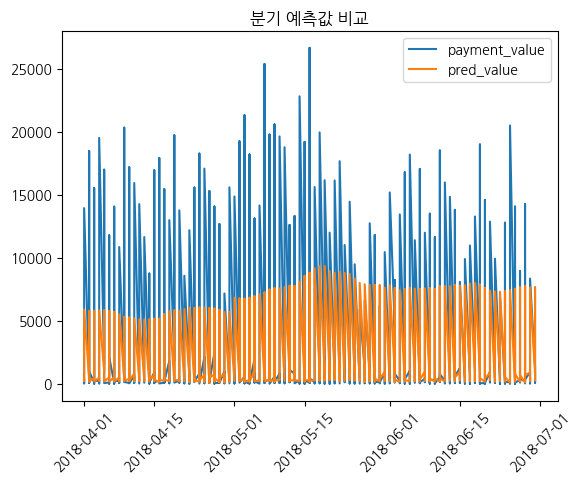

In [96]:
# 주
predict_week = result[(result.index>=pd.to_datetime('2018-05-06'))&(result.index<pd.to_datetime('2018-05-13'))]

plt.plot(predict_week['실제값'], linestyle='-', label='payment_value')
plt.plot(predict_week['예측값'], linestyle='-', label='pred_value')
plt.title('주간 예측값 비교')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 월
predict_month = result[(result.index>=pd.to_datetime('2018-05'))&(result.index<pd.to_datetime('2018-06'))]

plt.plot(predict_month['실제값'], linestyle='-', label='payment_value')
plt.plot(predict_month['예측값'], linestyle='-', label='pred_value')
plt.title('월간 예측값 비교')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 분기
predict_quarter = result[(result.index>=pd.to_datetime('2018-04'))&(result.index<pd.to_datetime('2018-07'))]

plt.plot(predict_quarter['실제값'], linestyle='-', label='payment_value')
plt.plot(predict_quarter['예측값'], linestyle='-', label='pred_value')
plt.title('분기 예측값 비교')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [97]:
real_week_pay_val = predict_week.실제값.sum()
real_month_pay_val = predict_month.실제값.sum()
real_quater_pay_val = predict_quarter.실제값.sum()

predict_week_pay_val = predict_week.예측값.sum()
predict_month_pay_val = predict_month.예측값.sum()
predict_quater_pay_val = predict_quarter.예측값.sum() 

diff_week_pay_val = predict_week.차이.sum()
diff_month_pay_val = predict_month.차이.sum()
diff_quater_pay_val = predict_quarter.차이.sum() 

In [98]:
diff_df = pd.DataFrame(index=['주','월','분기'], columns=['실제값', '예측값', '금액차이(R$)', '실제값과 차이 비율'])
diff_df['실제값'] = [real_week_pay_val, real_month_pay_val, real_quater_pay_val]
diff_df['예측값'] = [predict_week_pay_val, predict_month_pay_val, predict_quater_pay_val]
diff_df['금액차이(R$)'] = [diff_week_pay_val, diff_month_pay_val, diff_quater_pay_val]
# diff_df['금액차이(만원)'] = [int(diff_week_pay_val * real_to_won / 10000), int(diff_month_pay_val * real_to_won/ 10000), int(diff_quater_pay_val * real_to_won/ 10000)]
diff_df['실제값과 차이 비율'] = [round(diff_week_pay_val/real_week_pay_val*100,2),  round(diff_month_pay_val/real_month_pay_val*100,2), round(diff_quater_pay_val/real_quater_pay_val*100,2)]
diff_df

,실제값,예측값,금액차이(R$),실제값과 차이 비율
주,331939.61,163327.19,188950.56,56.92
월,1129306.43,689927.33,610278.36,54.04
분기,3275093.92,1890507.84,1755178.48,53.59
